## Diagram to Explain Identity Islands

In [1]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import random

### Load Graph

In [2]:
with open('../data/synthetic_data/synthetic_identity_islands.gpickle', 'rb') as f:
    G = pickle.load(f)

print("Synthetic data read complete.")

# Check the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print(f"Number of edges in the graph: {num_edges}")

with open('../data/synthetic_data/identity_islands.pkl', 'rb') as f:
    identity_islands = pickle.load(f)

# Select a sample island
sample_island = random.choice(identity_islands)

Synthetic data read complete.
Number of nodes in the graph: 113
Number of edges in the graph: 153


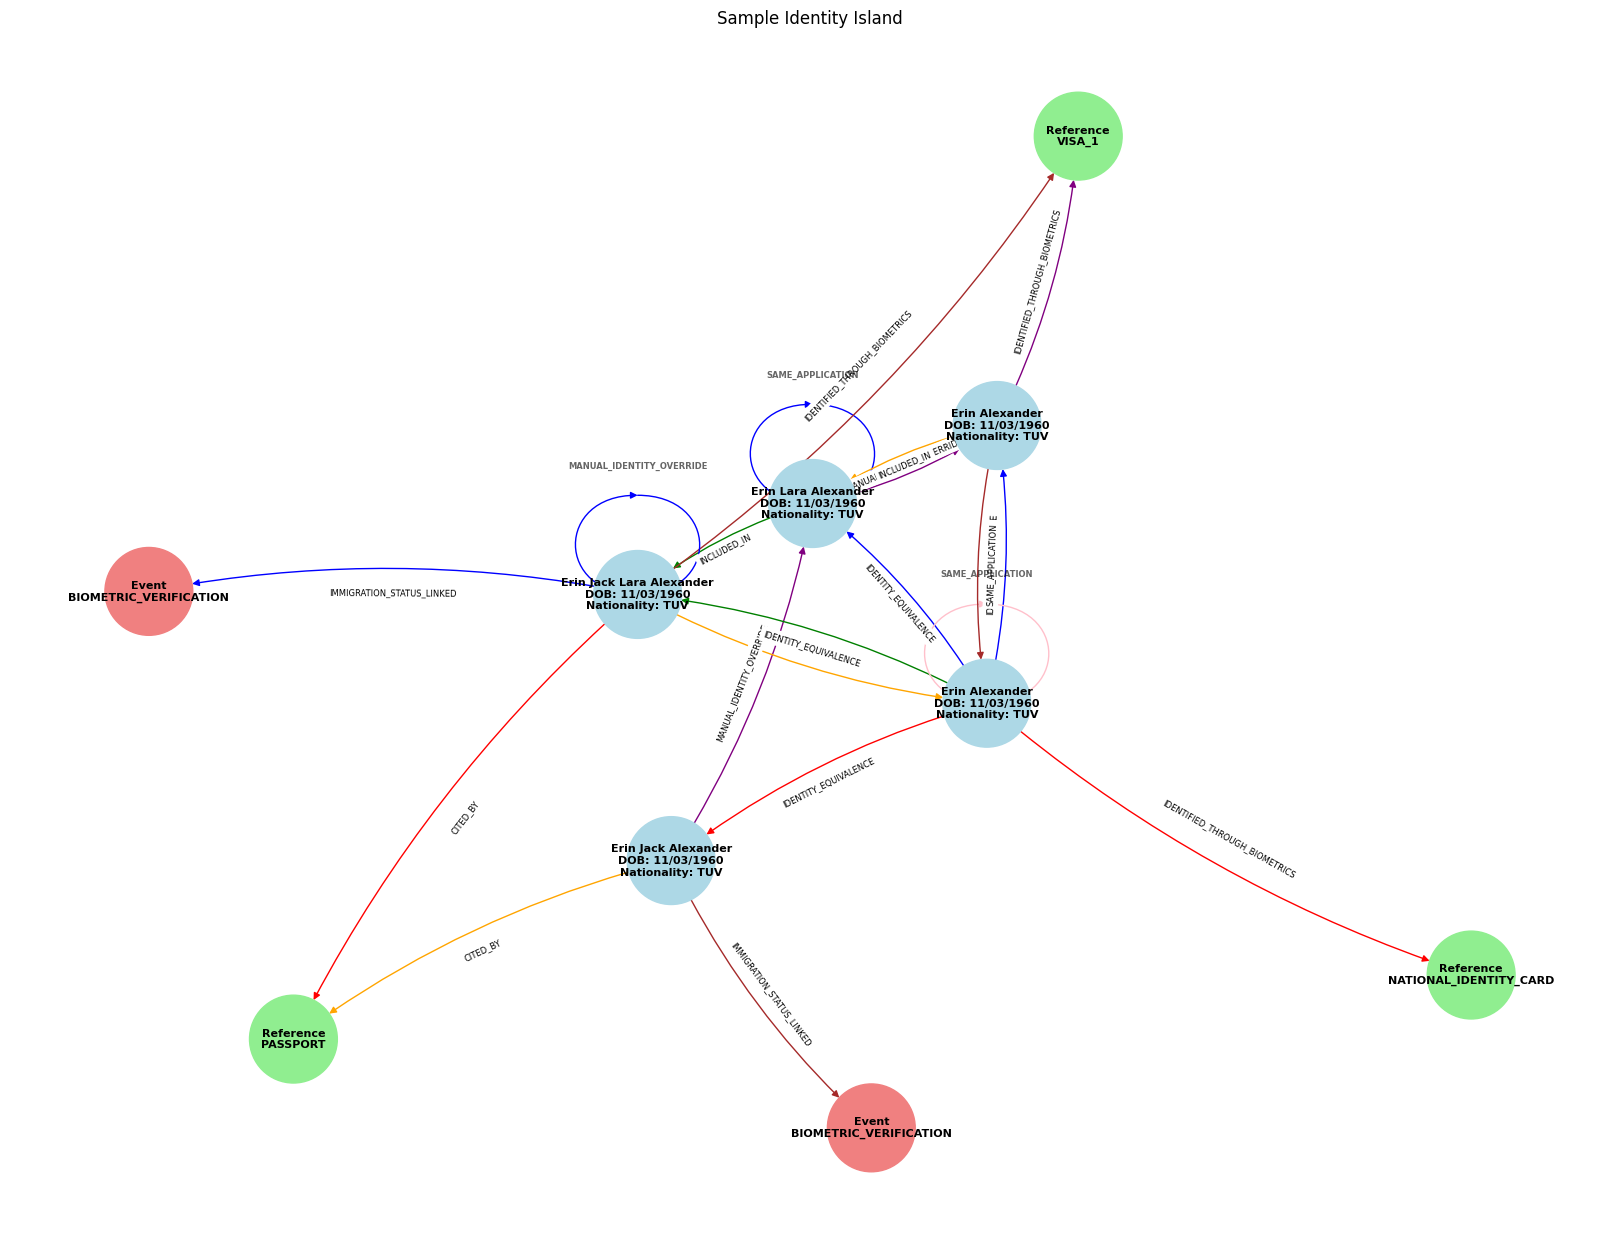

In [3]:
# Function to visualize a sample identity island and the anomalies
def draw_identity_island(G, sample_island, max_nodes=50):
    # Extract subgraph for the sample island with a limit on the number of nodes
    subgraph_nodes = set(sample_island)
    for node in sample_island:
        if len(subgraph_nodes) > max_nodes:
            break
        subgraph_nodes.update([target for _, target in G.edges(node)])
    subgraph = G.subgraph(subgraph_nodes)
    
    # Define colors for different types of nodes
    node_colors = []
    node_labels = {}
    for node, data in subgraph.nodes(data=True):
        if data['type'] == 'Identity':
            node_colors.append('lightblue')
            node_labels[node] = f"{data['name']}\nDOB: {data['date_of_birth']}\nNationality: {data['nationality']}"
        elif data['type'] == 'Reference':
            node_colors.append('lightgreen')
            node_labels[node] = f"Reference\n{data['doc_type']}"
        elif data['type'] == 'Event':
            node_colors.append('lightcoral')
            node_labels[node] = f"Event\n{data['event_type']}"
    
    # Define edge colors for different types of relationships
    edge_colors = []
    edge_labels = {}
    self_loop_edges = []
    self_loop_labels = {}
    for u, v, d in subgraph.edges(data=True):
        if u == v:
            self_loop_edges.append((u, v))
            self_loop_labels[(u, v)] = d['type']
            continue
        
        if d['type'] == 'IDENTITY_EQUIVALENCE':
            edge_colors.append('blue')
        elif d['type'] == 'INCLUDED_IN':
            edge_colors.append('green')
        elif d['type'] == 'CITED_BY':
            edge_colors.append('orange')
        elif d['type'] == 'IDENTIFIED_THROUGH_BIOMETRICS':
            edge_colors.append('red')
        elif d['type'] == 'MANUAL_IDENTITY_OVERRIDE':
            edge_colors.append('purple')
        elif d['type'] == 'IMMIGRATION_STATUS_LINKED':
            edge_colors.append('brown')
        elif d['type'] == 'SAME_APPLICATION':
            edge_colors.append('pink')
        else:
            edge_colors.append('black')
        edge_labels[(u, v)] = d['type']

    # Draw the graph
    pos = nx.spring_layout(subgraph, seed=42, k=0.3)  # Layout for better visualization
    plt.figure(figsize=(16, 12))
    nx.draw(subgraph, pos, labels=node_labels, with_labels=True, node_size=4000, node_color=node_colors, edge_color=edge_colors, font_size=8, font_weight='bold', connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='black', font_size=6)
    
    # Handle self-loop labels separately
    for (u, v), label in self_loop_labels.items():
        x, y = pos[u]
        dx = 0
        dy = 0.23
        plt.text(x + dx, y + dy, label, fontsize=6, color='black', weight='bold', horizontalalignment='center', verticalalignment='center', alpha=0.6)

    plt.title("Sample Identity Island")
    # plt.savefig('../data/identity_island_visuals/identity_island_visuals.png', format='png', bbox_inches='tight')
    plt.show()


# Draw the diagram
draw_identity_island(G, sample_island)

Here is a visual representation of a sample identity island. The diagram above shows:

1. **Nodes:**
   - **Identity nodes** (light blue)
   - **Reference nodes** (light green)
   - **Event nodes** (light coral)

2. **Edges:**
   - **IDENTITY_EQUIVALENCE** (blue): Represents equivalence or variations of identities.
   - **INCLUDED_IN** (green): Represents inclusion relationships.
   - **CITED_BY** (orange): Indicates references cited by an identity.
   - **IDENTIFIED_THROUGH_BIOMETRICS** (red): Represents biometric identification links.
   - **MANUAL_IDENTITY_OVERRIDE** (purple): Manual overrides of identity.
   - **IMMIGRATION_STATUS_LINKED** (brown): Links to immigration status events.
   - **SAME_APPLICATION** (pink): Represents links from the same application.

These elements together simulate a real-world scenario where identities have multiple variations, references, and events associated with them.

### Load Graph With Anomalies

In [4]:
with open('../data/anomalies_data/synthetic_identity_islands.gpickle', 'rb') as f:
    G = pickle.load(f)

print("Synthetic data read complete.")

# Check the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes in the graph: {num_nodes}")
print(f"Number of edges in the graph: {num_edges}")

with open('../data/synthetic_data/identity_islands.pkl', 'rb') as f:
    identity_islands = pickle.load(f)

print("Identity Island data read complete.")

Synthetic data read complete.
Number of nodes in the graph: 121
Number of edges in the graph: 163
Identity Island data read complete.


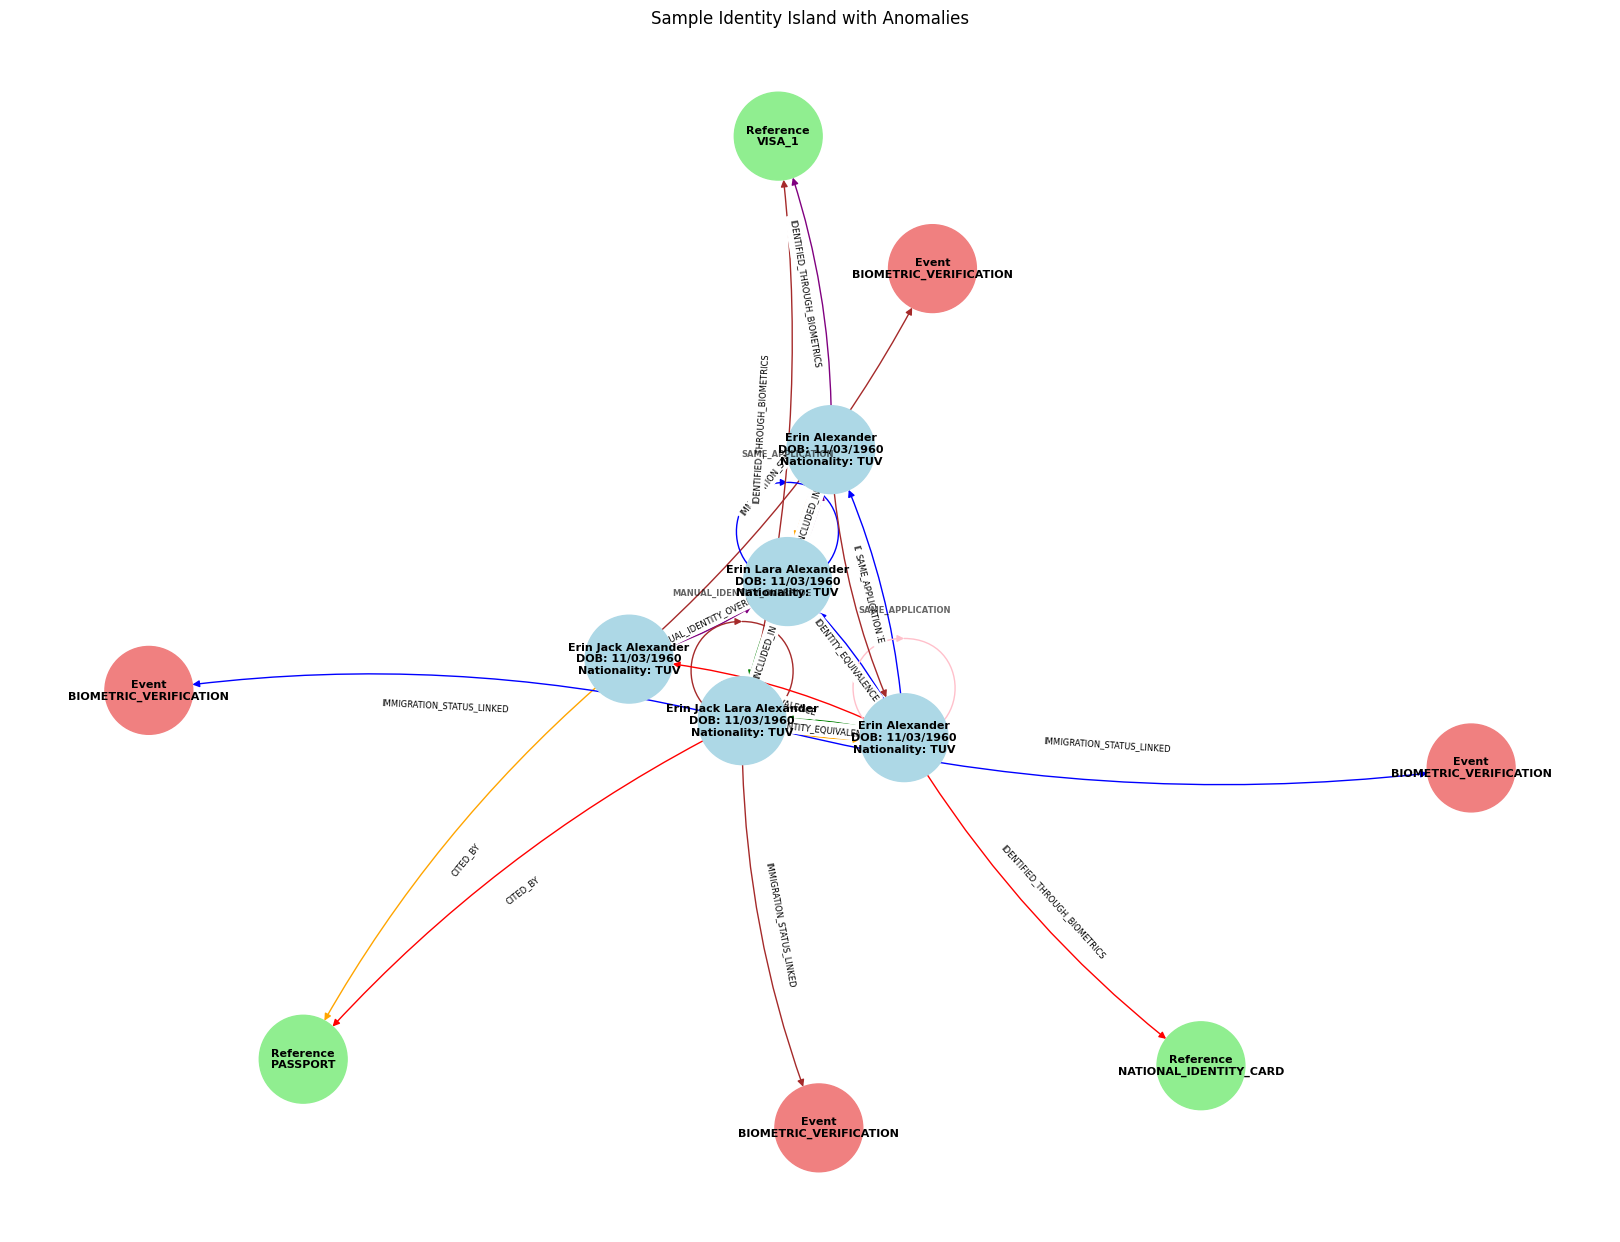

In [5]:
# Function to visualize a sample identity island and the anomalies
def draw_identity_island(G, sample_island, max_nodes=50):
    # Extract subgraph for the sample island with a limit on the number of nodes
    subgraph_nodes = set(sample_island)
    for node in sample_island:
        if len(subgraph_nodes) > max_nodes:
            break
        subgraph_nodes.update([target for _, target in G.edges(node)])
    subgraph = G.subgraph(subgraph_nodes)
    
    # Define colors for different types of nodes
    node_colors = []
    node_labels = {}
    for node, data in subgraph.nodes(data=True):
        if data['type'] == 'Identity':
            node_colors.append('lightblue')
            node_labels[node] = f"{data['name']}\nDOB: {data['date_of_birth']}\nNationality: {data['nationality']}"
        elif data['type'] == 'Reference':
            node_colors.append('lightgreen')
            node_labels[node] = f"Reference\n{data['doc_type']}"
        elif data['type'] == 'Event':
            node_colors.append('lightcoral')
            node_labels[node] = f"Event\n{data['event_type']}"
    
     # Define edge colors for different types of relationships
    edge_colors = []
    edge_labels = {}
    self_loop_edges = []
    self_loop_labels = {}
    for u, v, d in subgraph.edges(data=True):
        if u == v:
            self_loop_edges.append((u, v))
            self_loop_labels[(u, v)] = d['type']
            continue
        
        if d['type'] == 'IDENTITY_EQUIVALENCE':
            edge_colors.append('blue')
        elif d['type'] == 'INCLUDED_IN':
            edge_colors.append('green')
        elif d['type'] == 'CITED_BY':
            edge_colors.append('orange')
        elif d['type'] == 'IDENTIFIED_THROUGH_BIOMETRICS':
            edge_colors.append('red')
        elif d['type'] == 'MANUAL_IDENTITY_OVERRIDE':
            edge_colors.append('purple')
        elif d['type'] == 'IMMIGRATION_STATUS_LINKED':
            edge_colors.append('brown')
        elif d['type'] == 'SAME_APPLICATION':
            edge_colors.append('pink')
        else:
            edge_colors.append('black')
        edge_labels[(u, v)] = d['type']

    # Draw the graph
    pos = nx.spring_layout(subgraph, seed=42, k=0.3)  # Layout for better visualization
    plt.figure(figsize=(16, 12))
    nx.draw(subgraph, pos, labels=node_labels, with_labels=True, node_size=4000, node_color=node_colors, edge_color=edge_colors, font_size=8, font_weight='bold', connectionstyle='arc3,rad=0.1')
    nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=edge_labels, font_color='black', font_size=6)
    
    # Handle self-loop labels separately
    for (u, v), label in self_loop_labels.items():
        x, y = pos[u]
        dx = 0
        dy = 0.23
        plt.text(x + dx, y + dy, label, fontsize=6, color='black', weight='bold', horizontalalignment='center', verticalalignment='center', alpha=0.6)

    plt.title("Sample Identity Island with Anomalies")
    # plt.savefig('../data/identity_island_visuals/identity_island_visuals_with_anomalies.png', format='png', bbox_inches='tight')
    plt.show()

# Draw the diagram
draw_identity_island(G, sample_island)

Here is a visual representation of a sample identity island with various anomalies. The diagram above shows:

1. **Nodes:**
   - **Identity nodes** (light blue)
   - **Reference nodes** (light green)
   - **Event nodes** (light coral)

2. **Edges:**
   - **IDENTITY_EQUIVALENCE** (blue): Represents equivalence or variations of identities.
   - **INCLUDED_IN** (green): Represents inclusion relationships.
   - **CITED_BY** (orange): Indicates references cited by an identity.
   - **IDENTIFIED_THROUGH_BIOMETRICS** (red): Represents biometric identification links.
   - **MANUAL_IDENTITY_OVERRIDE** (purple): Manual overrides of identity.
   - **IMMIGRATION_STATUS_LINKED** (brown): Links to immigration status events.
   - **SAME_APPLICATION** (pink): Represents links from the same application.

These elements together simulate a real-world scenario where identities have multiple variations, references, and events associated with them, along with potential anomalies that can occur.